In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv('/content/output.csv')

In [6]:
diabetes_dataset.head()

,Emp_NO,Age,Urine Albumin,Sr.Bilirubin ( Total ),Blood Urea,Monocytes,Urine M/E - Casts,Eosinophils,Urine M/E - RBC,Urine M/E - Crystals,...,Erythrocyte Sedimentation Rate ( ESR ),SGOT / A S T,Sr.Alkaline Phosphatase,SGPT/ A L T,Haemoglobin,Urine M/E - Epithelialcells,Urine M/E - Puscells,Sr.Creatinine,Polymorphs,Urine Sugar
0,2562244905,58,Nil,Not Recorded,Not Recorded,00,Not being done,05,Not being done,Not being done,...,18,Not Recorded,Not Recorded,Not Recorded,12.8,Not being done,Not being done,Not Recorded,55,Nil
1,2365615987,54,Nil,Not Recorded,Not Recorded,00,Not being done,12,Not being done,Not being done,...,04,Not Recorded,Not Recorded,Not Recorded,16.0,Not being done,Not being done,Not Recorded,54,Nil
2,1830554845,55,Nil,Not Recorded,Not Recorded,00,Not being done,03,Not being done,Not being done,...,12,Not Recorded,Not Recorded,Not Recorded,15.7,Not being done,Not being done,Not Recorded,50,Nil
3,779794583,58,Nil,Not Recorded,Not Recorded,00,Not being done,09,Not being done,Not being done,...,12,Not Recorded,Not Recorded,Not Recorded,13.0,Not being done,Not being done,Not Recorded,60,Nil
4,64568147,54,Nil,Not Recorded,Not Recorded,00,Not being done,03,Not being done,Not being done,...,05,Not Recorded,Not Recorded,Not Recorded,15.7,Not being done,Not being done,Not Recorded,71,Nil


In [7]:
diabetes_dataset.shape

(3524, 25)

In [8]:
diabetes_dataset.describe()

,Emp_NO,Age
count,3.524000e+03,3524.000000
mean,2.106379e+09,53.758797
std,1.223519e+09,3.702803
min,6.288620e+06,42.000000
25%,1.047220e+09,51.000000
50%,2.087233e+09,54.000000
75%,3.074035e+09,57.000000
max,4.293952e+09,60.000000


In [19]:
coll = list(df.columns)
null = []
nr= []
nbd = []
for i in df.columns:
  null1 = list(df[i]).count("Nil")
  null.append(null1)
  nr1 = list(df[i]).count("Not Recorded")
  nr.append(nr1)
  nbd1 = list(df[i]).count("Not being done")
  nbd.append(nbd1)
  print(i,"null",null,"not recorded",nr,"not being done",nbd)

Emp_NO null [0] not recorded [0] not being done [0]
Age null [0, 0] not recorded [0, 0] not being done [0, 0]
Urine Albumin null [0, 0, 3459] not recorded [0, 0, 57] not being done [0, 0, 0]
Sr.Bilirubin ( Total ) null [0, 0, 3459, 0] not recorded [0, 0, 57, 2969] not being done [0, 0, 0, 0]
Blood Urea null [0, 0, 3459, 0, 0] not recorded [0, 0, 57, 2969, 2969] not being done [0, 0, 0, 0, 0]
Monocytes null [0, 0, 3459, 0, 0, 0] not recorded [0, 0, 57, 2969, 2969, 1] not being done [0, 0, 0, 0, 0, 0]
Urine M/E - Casts null [0, 0, 3459, 0, 0, 0, 0] not recorded [0, 0, 57, 2969, 2969, 1, 321] not being done [0, 0, 0, 0, 0, 0, 3203]
Eosinophils null [0, 0, 3459, 0, 0, 0, 0, 0] not recorded [0, 0, 57, 2969, 2969, 1, 321, 1] not being done [0, 0, 0, 0, 0, 0, 3203, 0]
Urine M/E - RBC null [0, 0, 3459, 0, 0, 0, 0, 0, 0] not recorded [0, 0, 57, 2969, 2969, 1, 321, 1, 321] not being done [0, 0, 0, 0, 0, 0, 3203, 0, 3203]
Urine M/E - Crystals null [0, 0, 3459, 0, 0, 0, 0, 0, 0, 0] not recorded [0

In [20]:
print(null)

[0, 0, 3459, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3135]


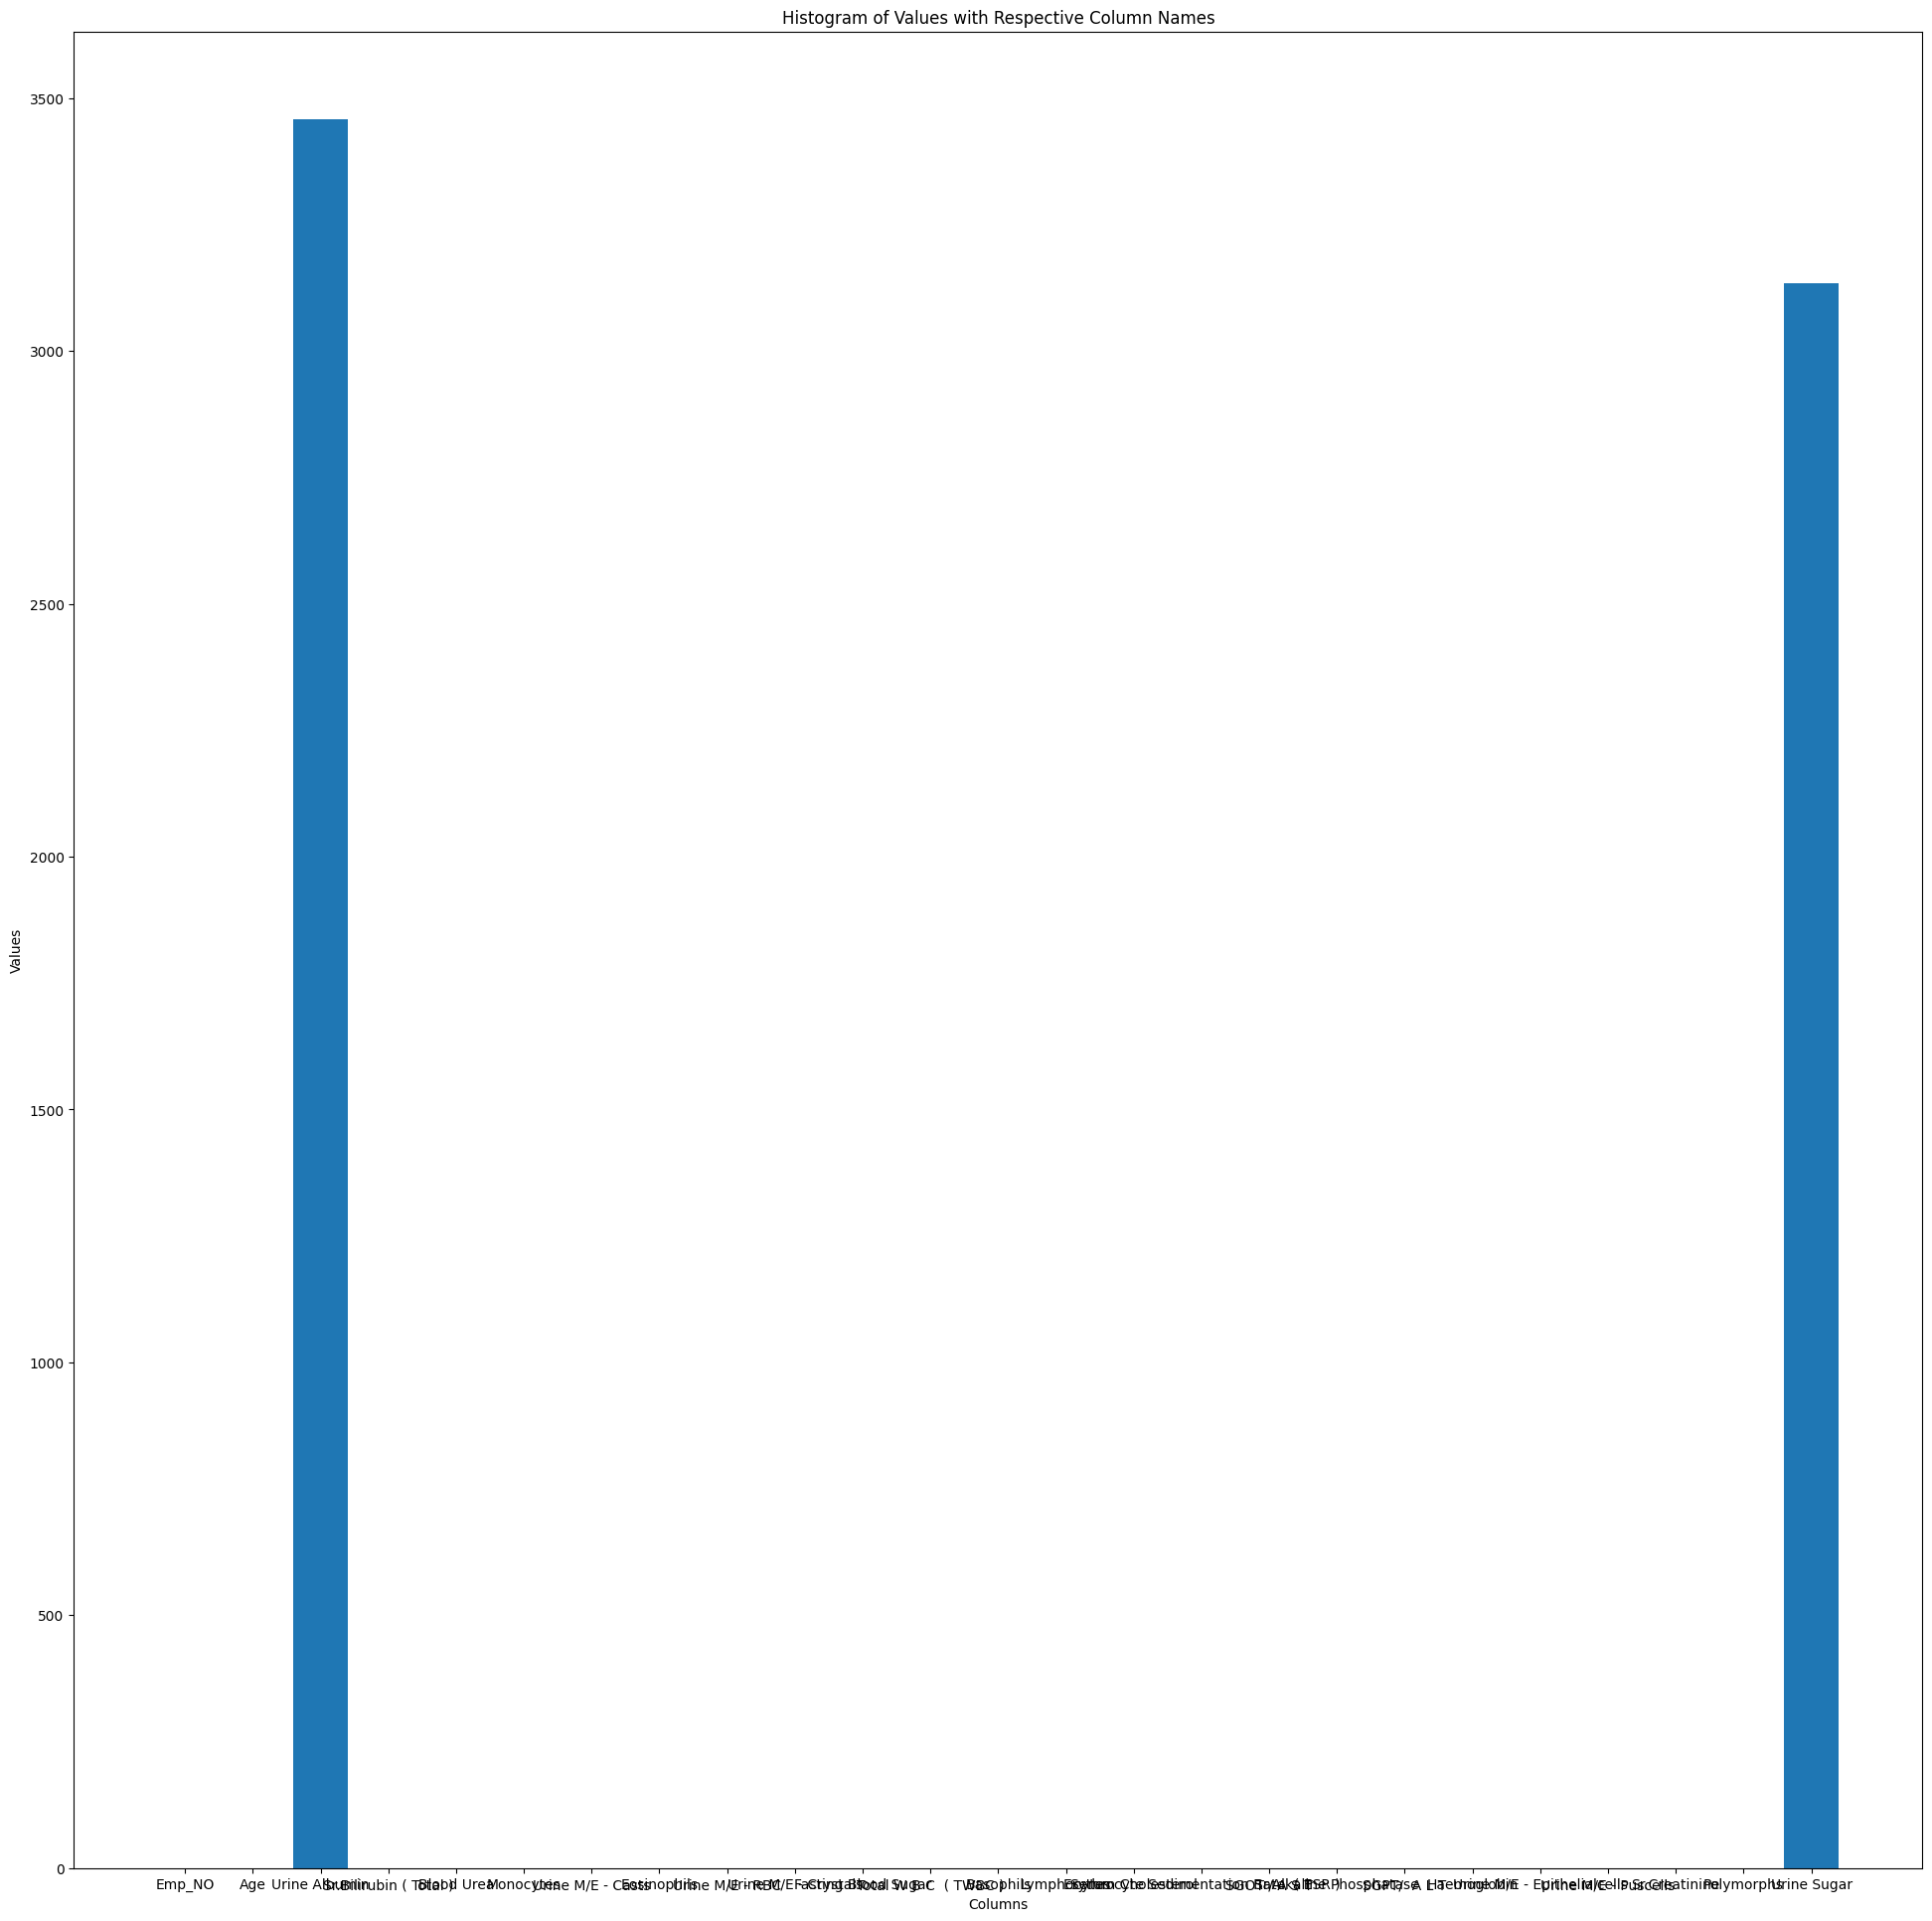

In [24]:

# Sample data
values = null
column_names = coll

# Plot histogram
plt.figure(figsize=(24, 24))
plt.bar(column_names, values)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Histogram of Values with Respective Column Names')
plt.show()



In [26]:
print(coll)
print(null)

['Emp_NO', 'Age', 'Urine Albumin', 'Sr.Bilirubin ( Total )', 'Blood Urea', 'Monocytes', 'Urine M/E - Casts', 'Eosinophils', 'Urine M/E - RBC', 'Urine M/E - Crystals', 'Fasting Blood Sugar', 'Total W B C  ( TWBC )', 'Basophils', 'Lymphocytes', 'Serum Cholesterol', 'Erythrocyte Sedimentation Rate  ( ESR )', 'SGOT / A S T', 'Sr.Alkaline Phosphatase', 'SGPT/  A L T', 'Haemoglobin', 'Urine M/E - Epithelialcells', 'Urine M/E - Puscells', 'Sr.Creatinine', 'Polymorphs', 'Urine Sugar']
[0, 0, 3459, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3135]


In [28]:
print(coll)
print(nbd)

['Emp_NO', 'Age', 'Urine Albumin', 'Sr.Bilirubin ( Total )', 'Blood Urea', 'Monocytes', 'Urine M/E - Casts', 'Eosinophils', 'Urine M/E - RBC', 'Urine M/E - Crystals', 'Fasting Blood Sugar', 'Total W B C  ( TWBC )', 'Basophils', 'Lymphocytes', 'Serum Cholesterol', 'Erythrocyte Sedimentation Rate  ( ESR )', 'SGOT / A S T', 'Sr.Alkaline Phosphatase', 'SGPT/  A L T', 'Haemoglobin', 'Urine M/E - Epithelialcells', 'Urine M/E - Puscells', 'Sr.Creatinine', 'Polymorphs', 'Urine Sugar']
[0, 0, 0, 0, 0, 0, 3203, 0, 3203, 3203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3203, 3203, 0, 0, 0]


In [30]:
print(coll)
print(nr)

['Emp_NO', 'Age', 'Urine Albumin', 'Sr.Bilirubin ( Total )', 'Blood Urea', 'Monocytes', 'Urine M/E - Casts', 'Eosinophils', 'Urine M/E - RBC', 'Urine M/E - Crystals', 'Fasting Blood Sugar', 'Total W B C  ( TWBC )', 'Basophils', 'Lymphocytes', 'Serum Cholesterol', 'Erythrocyte Sedimentation Rate  ( ESR )', 'SGOT / A S T', 'Sr.Alkaline Phosphatase', 'SGPT/  A L T', 'Haemoglobin', 'Urine M/E - Epithelialcells', 'Urine M/E - Puscells', 'Sr.Creatinine', 'Polymorphs', 'Urine Sugar']
[0, 0, 57, 2969, 2969, 1, 321, 1, 321, 321, 1, 1, 1, 1, 1, 1, 2969, 2969, 2969, 1, 321, 321, 2969, 1, 57]
['Emp_NO', 'Age', 'Urine Albumin', 'Sr.Bilirubin ( Total )', 'Blood Urea', 'Monocytes', 'Urine M/E - Casts', 'Eosinophils', 'Urine M/E - RBC', 'Urine M/E - Crystals', 'Fasting Blood Sugar', 'Total W B C  ( TWBC )', 'Basophils', 'Lymphocytes', 'Serum Cholesterol', 'Erythrocyte Sedimentation Rate  ( ESR )', 'SGOT / A S T', 'Sr.Alkaline Phosphatase', 'SGPT/  A L T', 'Haemoglobin', 'Urine M/E - Epithelialcells', 

In [32]:
k=[]
for i in range(len(coll)):
  k.append(null[i]+nr[i]+nbd[i])


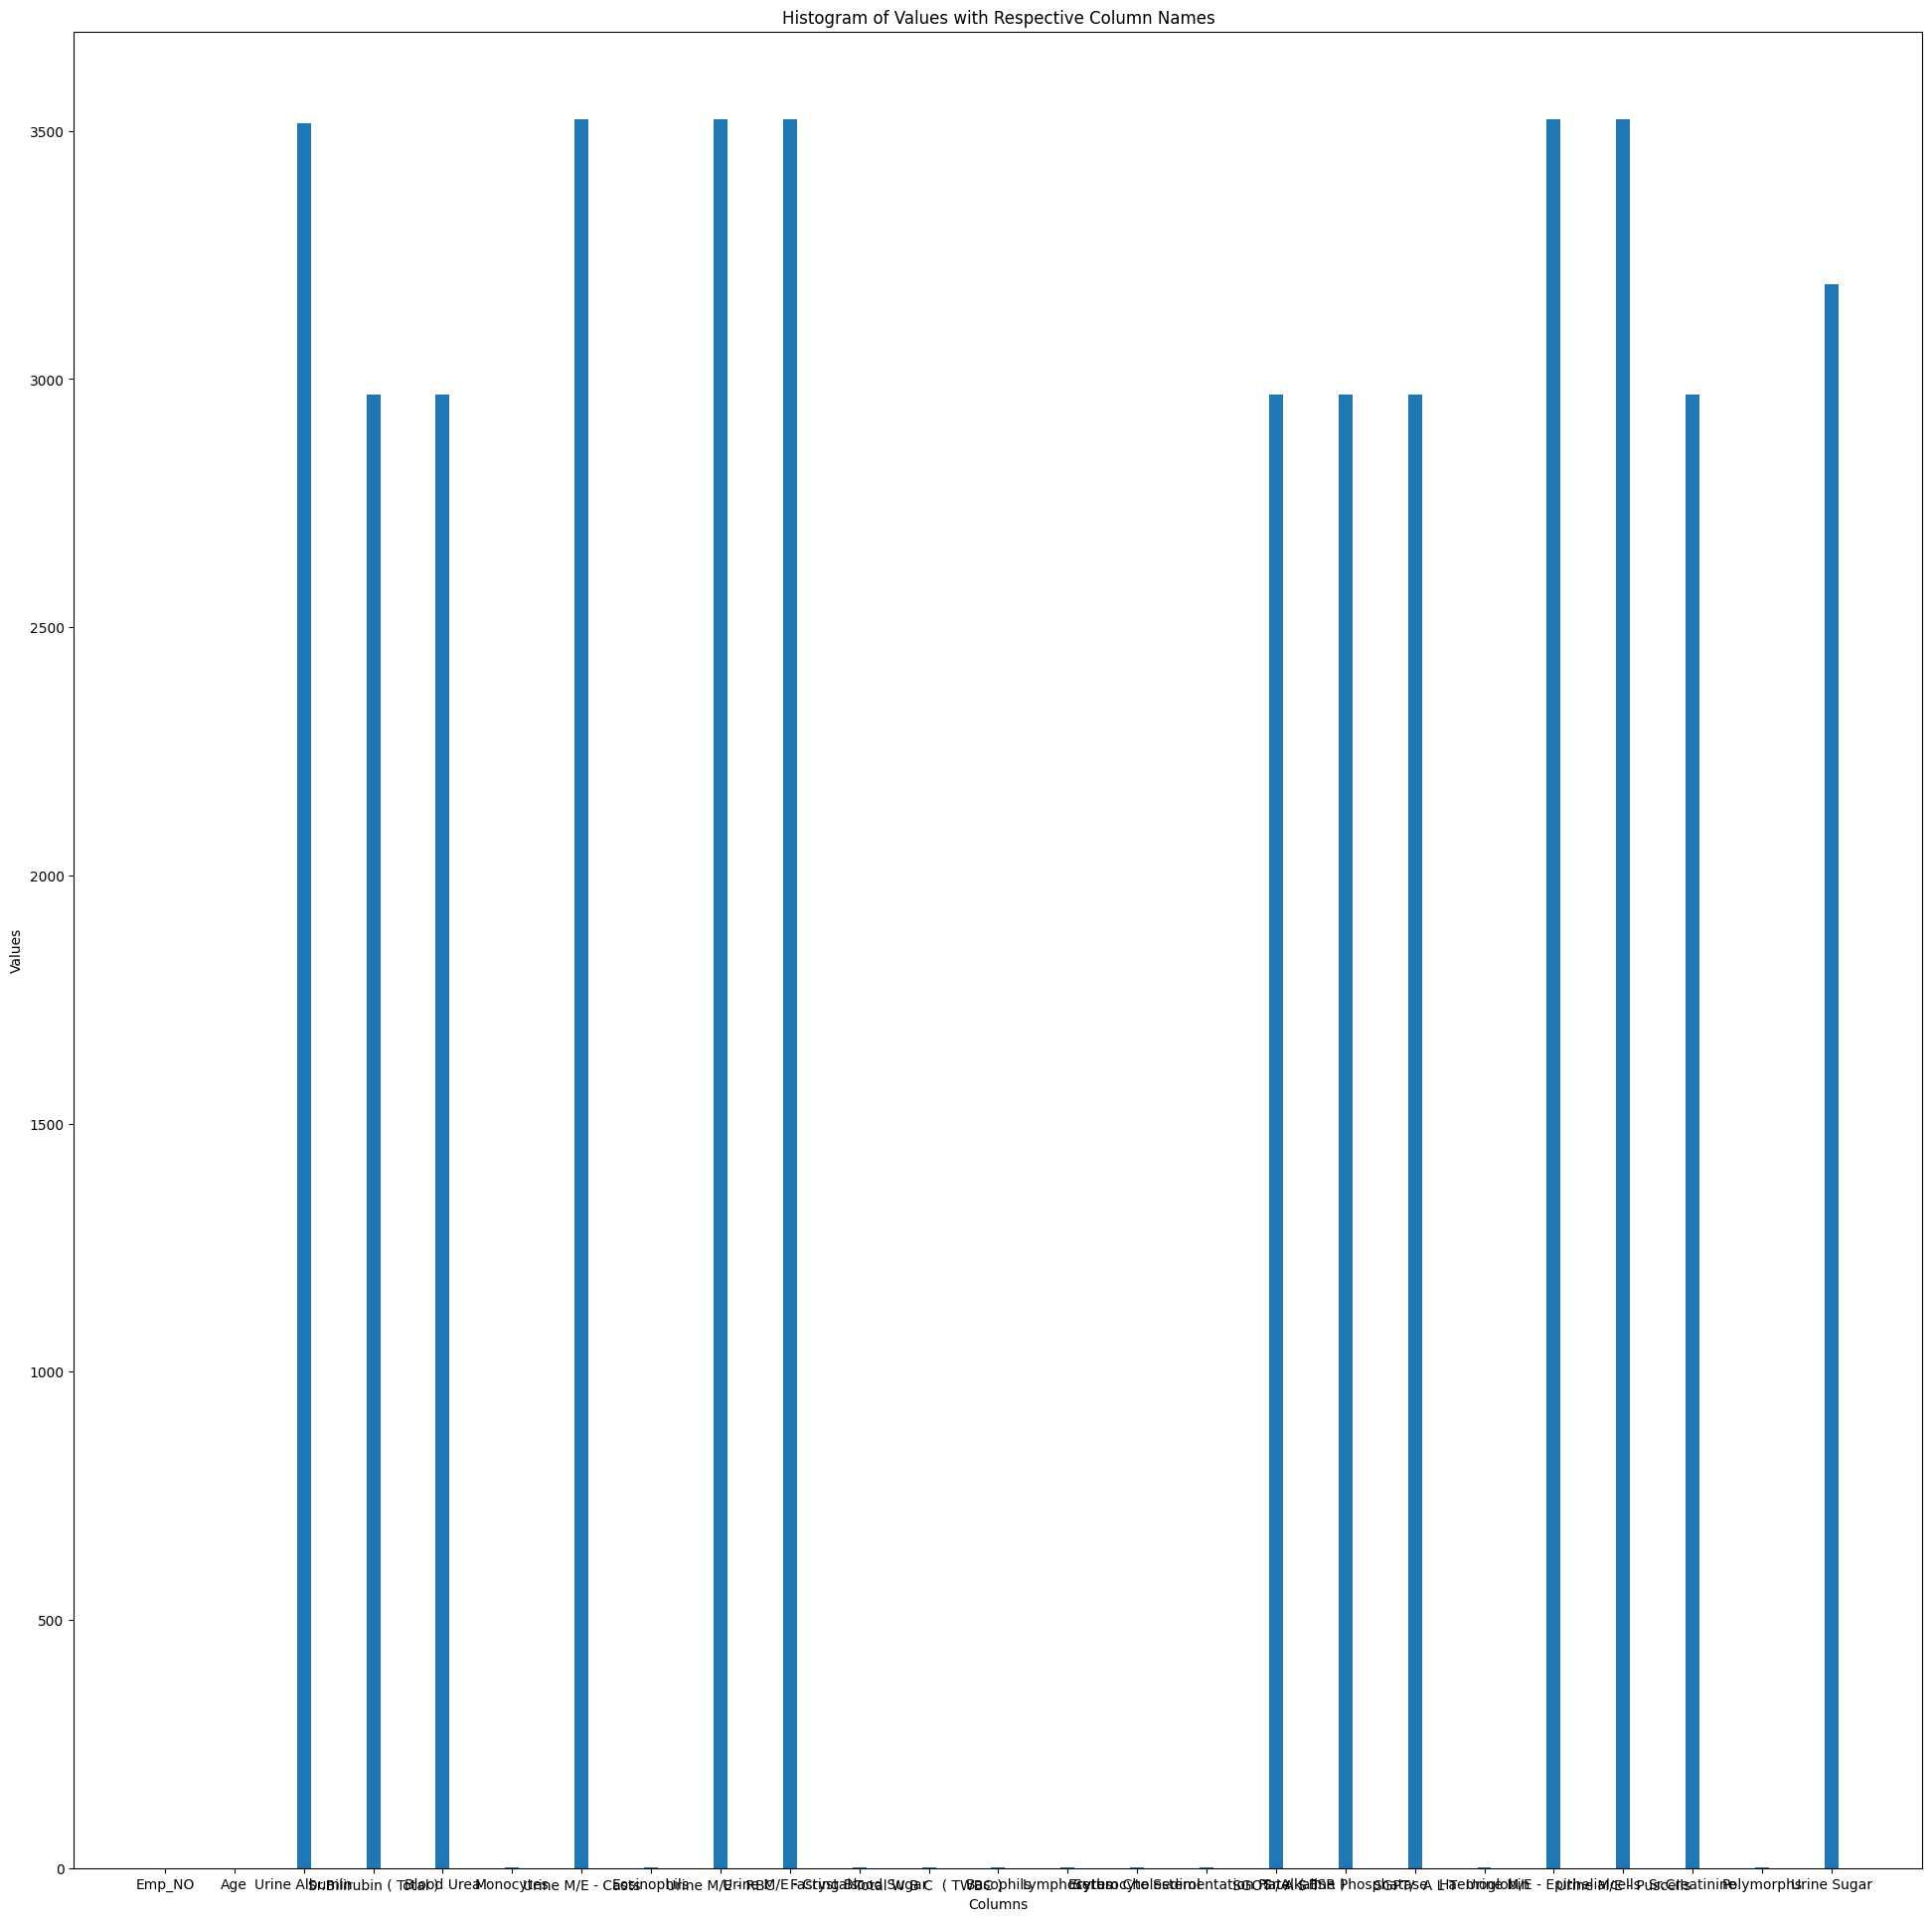

In [36]:
# Sample data
values = k
column_names = coll

# Plot histogram
plt.figure(figsize=(24, 24))
plt.bar(column_names, values,width=0.2)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Histogram of Values with Respective Column Names')
plt.show()


In [38]:
l = []
for i in range(len(column_names)):
  if k[i] >= 500:
    l.append(column_names[i])
    print(column_names[i],":",k[i])

Urine Albumin : 3516
Sr.Bilirubin ( Total ) : 2969
Blood Urea : 2969
Urine M/E - Casts : 3524
Urine M/E - RBC : 3524
Urine M/E - Crystals : 3524
SGOT / A S T : 2969
Sr.Alkaline Phosphatase : 2969
SGPT/  A L T : 2969
Urine M/E - Epithelialcells : 3524
Urine M/E - Puscells : 3524
Sr.Creatinine : 2969
Urine Sugar : 3192


In [39]:
columns_to_remove = l
df.drop(columns=columns_to_remove, inplace=True)

# Display the DataFrame after removing columns
print("\nDataFrame after removing columns:")
print(df)


DataFrame after removing columns:
          Emp_NO  Age Monocytes Eosinophils Fasting Blood Sugar  \
0     2562244905   58        00          05                  87   
1     2365615987   54        00          12                  80   
2     1830554845   55        00          03                  99   
3      779794583   58        00          09                 111   
4       64568147   54        00          03                  78   
...          ...  ...       ...         ...                 ...   
3519  1631831483   52        00          08                  81   
3520  1631831483   53        00          05                  90   
3521  1631831483   55        00          05                  83   
3522  1631831483   56        00          04                  95   
3523  1631831483   58        00          04                 101   

     Total W B C  ( TWBC ) Basophils Lymphocytes Serum Cholesterol  \
0                     5800        00          40               165   
1                   